In [50]:
from keras.layers import MaxPooling2D,Input,Conv2D,UpSampling2D,Dense
from keras.models import Model
from keras.callbacks import TensorBoard
from keras.datasets import mnist
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt


In [51]:
(x_train,_),(x_test,_)=mnist.load_data()

## veri oluşturmak ayırmak

In [52]:
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

x_train=np.reshape(x_train,(len(x_train),28,28,1))
x_test=np.reshape(x_test,(len(x_test),28,28,1))

## gürültü ekleme

In [53]:
print(x_test.shape)
print(x_train.shape)

(10000, 28, 28, 1)
(60000, 28, 28, 1)


In [54]:
noise=0.5

x_train_noisy=x_train+noise*np.random.normal(size=x_train.shape)
x_test_noisy=x_test+noise*np.random.normal(size=x_test.shape)

x_train_noisy=np.clip(x_train_noisy,0.,1.)
x_test_noisy=np.clip(x_test_noisy,0.,1.)

### veriyi görselleştirme

In [55]:
%matplotlib inline

gürültülü orjinal görüntüler


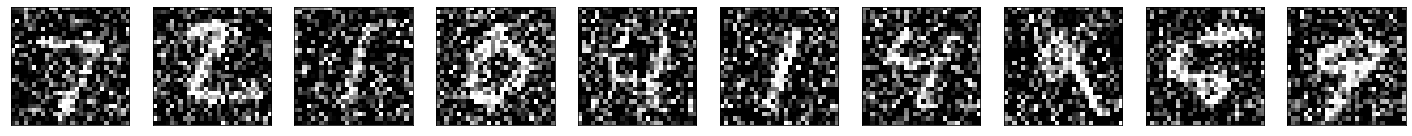

In [56]:
plt.figure(figsize=(25,5))

print("gürültülü orjinal görüntüler")

for i in range(10):
  ax=plt.subplot(2,10,i+1)
  plt.imshow(x_test_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()


## encode

In [57]:
inpt_img=Input(shape=(28,28,1))
x=Conv2D(32,(3,3),padding="same",activation="relu")(inpt_img)
x=MaxPooling2D((2,2),padding="same")(x)
x=Conv2D(32,(3,3),padding="same",activation="relu")(x)
encoded=MaxPooling2D((2,2),padding="same")(x)
#(7,7,32)

## decode

In [58]:
x=Conv2D(32,(3,3),padding="same",activation="relu")(encoded)
x=UpSampling2D((2,2))(x)
x=Conv2D(32,(3,3),padding="same",activation="relu")(x)
x=UpSampling2D((2,2))(x)
decoded=Conv2D(1,(3,3),activation="sigmoid",padding="same")(x)

In [59]:
otoencoder=Model(inpt_img,decoded)


In [60]:
otoencoder.compile(optimizer="adadelta",loss="binary_crossentropy",metrics=["acc"])

In [61]:
otoencoder.fit(x_train_noisy,x_train,
               batch_size=128,
               epochs=15,
               shuffle=True,
               validation_data=(x_test_noisy,x_test),
               callbacks=[TensorBoard(log_dir="/tmp/tb",histogram_freq=0,write_graph="False")])


Epoch 1/15
469/469 [==============================] - 3s 7ms/step - loss: 0.6611 - acc: 0.8082 - val_loss: 0.6462 - val_acc: 0.8072
Epoch 2/15
469/469 [==============================] - 3s 7ms/step - loss: 0.6180 - acc: 0.8088 - val_loss: 0.5843 - val_acc: 0.8072
Epoch 3/15
469/469 [==============================] - 3s 7ms/step - loss: 0.5445 - acc: 0.8088 - val_loss: 0.5159 - val_acc: 0.8072
Epoch 4/15
469/469 [==============================] - 3s 7ms/step - loss: 0.5017 - acc: 0.8088 - val_loss: 0.4986 - val_acc: 0.8072
Epoch 5/15
469/469 [==============================] - 3s 7ms/step - loss: 0.4913 - acc: 0.8088 - val_loss: 0.4911 - val_acc: 0.8072
Epoch 6/15
469/469 [==============================] - 3s 7ms/step - loss: 0.4838 - acc: 0.8088 - val_loss: 0.4835 - val_acc: 0.8072
Epoch 7/15
469/469 [==============================] - 3s 7ms/step - loss: 0.4763 - acc: 0.8088 - val_loss: 0.4760 - val_acc: 0.8072
Epoch 8/15
469/469 [==============================] - 3s 7ms/step - loss: 0.

In [62]:
decode_img=otoencoder.predict(x_test)


gürültüsü bastırılmış görüntüler


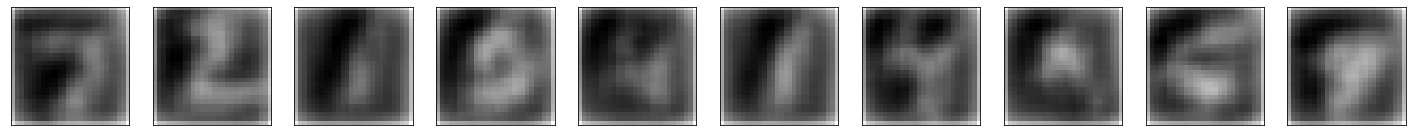

In [63]:
%matplotlib inline
plt.figure(figsize=(25,5))


print("gürültüsü bastırılmış görüntüler")

for i in range(10):
  ax=plt.subplot(2,10,i+1)
  plt.imshow(decode_img[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()